# Practice Case - Exploratory Data Analysis

## Table of Contents :

* <span style='color:Purple'> **Scenario** </span>
* <span style='color:Purple'> **Data Preprocessing** </span>
* <span style='color:Purple'> **Exploratory Data Analysis** </span>
* <span style='color:Purple'> **Conclusion** </span>


## <span style='color:Purple'> **Scenario** </span>

Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 

<span style='color:forestgreen'> **1) BBC Sports Football** </span>

<span style='color:forestgreen'> **2) Premierleague.com** </span>

<span style='color:forestgreen'> **3) Transfermarkt.co.uk** </span> 

## Data Pre-processing

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
df = pd.read_csv('epl_1819.csv')
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [61]:
df.tail()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
15,Southampton,No UEFA Competitions,16,10,104302937,38,9,12,17,0.315068,65,-20,39,28,28.0,22,160072000,5720000,0.248915,0.152672,0.551601,0.220411,0.404762,0.335443,0.380805,0.355263,0.000000,0.333333,0.208955,0.928571,71,3,0.111111,1.000000,0.622222,0.566038,1.000000,0.853774,0.50,0.909879,0.805031,0.222222,0.253012,0.402390
16,Brighton,No UEFA Competitions,17,13,105741728,38,9,9,20,0.178082,60,-25,36,23,28.4,16,152680000,6635200,0.237420,0.000000,0.755338,0.231751,0.293651,0.101266,0.034056,0.000000,0.400000,0.444444,0.253731,0.000000,60,4,0.444444,0.000000,0.588889,0.672956,0.636752,0.768868,0.50,0.655113,0.795597,1.000000,0.200803,0.434263
17,Cardiff,Relegated,18,12,102704107,38,10,4,24,0.164384,69,-35,34,25,29.7,10,152020000,6080800,0.000000,0.183206,0.657473,0.000000,0.000000,0.177215,0.176471,0.118421,0.000000,0.222222,0.179104,0.285714,66,1,0.000000,0.000000,0.922222,0.528302,0.914530,0.646226,0.50,0.753899,0.635220,0.777778,0.000000,0.000000
18,Fulham,Relegated,19,13,101904692,38,7,5,26,0.164384,81,-47,26,25,26.7,18,106920000,4276800,0.456924,0.137405,0.572064,0.472006,0.194444,0.132911,0.291022,0.250000,0.200000,0.111111,0.194030,0.214286,68,2,0.222222,0.000000,0.988889,0.509434,0.508547,0.344340,0.00,0.741768,0.619497,0.666667,0.405622,0.653386
19,Huddersfield,Relegated,20,10,96628865,38,3,7,28,0.000000,76,-54,16,28,28.5,27,85492000,3053600,0.347050,0.061069,0.737544,0.380581,0.821429,0.139241,0.123839,0.065789,0.266667,0.000000,0.000000,0.285714,55,4,0.111111,0.333333,0.622222,0.421384,0.923077,0.905660,0.25,0.199307,0.000000,0.777778,0.321285,0.474104


In [3]:
df.shape

(20, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

### Case No 1

### <span style='color:Blue'> **1.	Is this data clean?** </span>

In [5]:
# Menghitung data duplikasi

print('Jumlah Data Duplikasi dalam Dataset:', df.duplicated(subset=None).sum())

Jumlah Data Duplikasi dalam Dataset: 0


In [6]:
# Menghitung missing values

print('Jumlah Missing Values dalam Dataset:', df.isna().sum().sum())

Jumlah Missing Values dalam Dataset: 0


### <span style='color:Red'> **Based on inspection above we concluded Dataset is already clean**</span>

### Case No 2

### <span style='color:Blue'> **2.	How is the point distribution of the epl team? and which team is an anomaly?** </span>

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


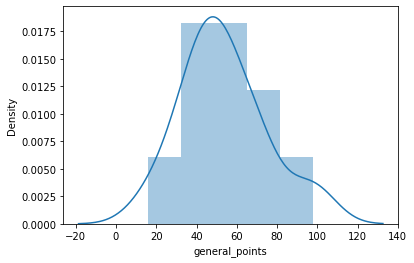

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(df['general_points'])
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


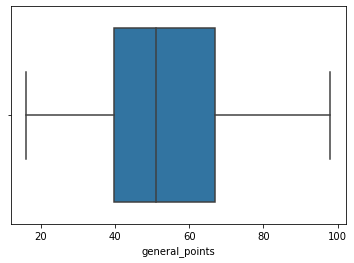

In [8]:
sns.boxplot(df['general_points'])
plt.show()

In [9]:
# Check outliers using IQR Score
# Q1, Q3, dan IQR
Q1 = df['general_points'].quantile(0.25)
Q3 = df['general_points'].quantile(0.75)
IQR = Q3 - Q1

# Check shape (rows and columns) before removing outliers
print('Shape awal: ', df.shape)

Shape awal:  (20, 44)


In [10]:
# Removing outliers
df_cek = df[~((df['general_points'] < (Q1 - 1.5 * IQR)) | (df['general_points'] > (Q3 + 1.5 * IQR)))]

# Check shape (rows and columns) after removing outliers
print('Shape akhir: ', df.shape)

Shape akhir:  (20, 44)


### <span style='color:Red'> **Based on histogram and boxplot, there's no outliers or anomaly in dataset. Removing outliers using IQR score also was carried out, the shape of dataset remained has same rows and columns. Conclusion, there is no outliers/ anomaly data in dataset.**</span>

### Case No 3

### <span style='color:Blue'> **3.	Which team has the best attack?** </span>

In [11]:
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [14]:
# Convert column 'attack_passes'
df['attack_passes'] = df['attack_passes'].str.replace(',', '')
df[['attack_passes']] = df[['attack_passes']].apply(pd.to_numeric)

AttributeError: Can only use .str accessor with string values!

In [13]:
# Convert column 'attack_passes'
df['attack_passes_long'] = df['attack_passes_long'].str.replace(',', '')
df[['attack_passes_long']] = df[['attack_passes_long']].apply(pd.to_numeric)

In [15]:
# Convert column 'attack_passes'
df['attack_passes_back'] = df['attack_passes_back'].str.replace(',', '')
df[['attack_passes_back']] = df[['attack_passes_back']].apply(pd.to_numeric)

In [16]:
print(df.dtypes)

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [17]:
from sklearn.preprocessing import MinMaxScaler 

#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  

#list all the feature that need to be scaled  
scaling_column = ['attack_scored','attack_passes','attack_passes_through', 'attack_passes_long', 'attack_passes_back', 'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick', 'attack_posession', 'attack_pass_accuracy'] 

#Apply fit_transfrom to scale selected feature  
df[scaling_column] = scaler.fit_transform(df[scaling_column])

#Cheking min and max value of the scaling_column
print(df[scaling_column].describe().T[['min','max']])

                         min  max
attack_scored            0.0  1.0
attack_passes            0.0  1.0
attack_passes_through    0.0  1.0
attack_passes_long       0.0  1.0
attack_passes_back       0.0  1.0
attack_crosses           0.0  1.0
attack_corners_taken     0.0  1.0
attack_shots             0.0  1.0
attack_shots_on_target   0.0  1.0
attack_goals_headed      0.0  1.0
attack_goals_penalty     0.0  1.0
attack_goals_box         0.0  1.0
attack_goals_outsidebox  0.0  1.0
attack_goals_counter     0.0  1.0
attack_goals_freekick    0.0  1.0
attack_posession         0.0  1.0
attack_pass_accuracy     0.0  1.0


In [49]:
df2= df.groupby(by=['Team']).mean()[['attack_scored','attack_passes','attack_passes_through', 'attack_passes_long', 'attack_passes_back', 'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick', 'attack_posession', 'attack_pass_accuracy']].reset_index()

In [26]:
df2.drop(columns=['Team'], inplace=True)

In [33]:
df2

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Bournemouth,0.465753,0.349557,0.320611,0.140569,0.294472,0.202381,0.322785,0.266254,0.361842,0.466667,0.666667,0.492537,0.357143,1.000000,0.000000,0.345382,0.565737
1,Arsenal,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.333333,1.000000,0.682731,0.772908
2,Brighton,0.178082,0.237420,0.000000,0.755338,0.231751,0.293651,0.101266,0.034056,0.000000,0.400000,0.444444,0.253731,0.000000,0.444444,0.000000,0.200803,0.434263
3,Burnley,0.315068,0.170284,0.152672,1.000000,0.222537,0.519841,0.000000,0.000000,0.052632,0.600000,0.111111,0.388060,0.071429,0.111111,0.000000,0.172691,0.254980
4,Cardiff,0.164384,0.000000,0.183206,0.657473,0.000000,0.000000,0.177215,0.176471,0.118421,0.000000,0.222222,0.179104,0.285714,0.000000,0.000000,0.000000,0.000000
5,Chelsea,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.111111,0.333333,0.835341,0.944223
6,Crystal Palace,0.397260,0.306756,0.083969,0.431495,0.288802,0.059524,0.411392,0.411765,0.263158,0.066667,1.000000,0.388060,0.500000,0.222222,0.666667,0.301205,0.513944
7,Everton,0.438356,0.383247,0.221374,0.476868,0.334515,1.000000,0.474684,0.427245,0.401316,0.600000,0.111111,0.417910,0.642857,0.333333,0.000000,0.477912,0.533865
8,Fulham,0.164384,0.456924,0.137405,0.572064,0.472006,0.194444,0.132911,0.291022,0.250000,0.200000,0.111111,0.194030,0.214286,0.222222,0.000000,0.405622,0.653386
9,Huddersfield,0.000000,0.347050,0.061069,0.737544,0.380581,0.821429,0.139241,0.123839,0.065789,0.266667,0.000000,0.000000,0.285714,0.111111,0.333333,0.321285,0.474104


In [50]:
df2['Average'] = df2.mean(axis=1)

In [51]:
df2

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,Average
0,Bournemouth,0.465753,0.349557,0.320611,0.140569,0.294472,0.202381,0.322785,0.266254,0.361842,0.466667,0.666667,0.492537,0.357143,1.000000,0.000000,0.345382,0.565737,0.389315
1,Arsenal,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.333333,1.000000,0.682731,0.772908,0.500089
2,Brighton,0.178082,0.237420,0.000000,0.755338,0.231751,0.293651,0.101266,0.034056,0.000000,0.400000,0.444444,0.253731,0.000000,0.444444,0.000000,0.200803,0.434263,0.235838
3,Burnley,0.315068,0.170284,0.152672,1.000000,0.222537,0.519841,0.000000,0.000000,0.052632,0.600000,0.111111,0.388060,0.071429,0.111111,0.000000,0.172691,0.254980,0.243672
4,Cardiff,0.164384,0.000000,0.183206,0.657473,0.000000,0.000000,0.177215,0.176471,0.118421,0.000000,0.222222,0.179104,0.285714,0.000000,0.000000,0.000000,0.000000,0.127307
5,Chelsea,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.111111,0.333333,0.835341,0.944223,0.573277
6,Crystal Palace,0.397260,0.306756,0.083969,0.431495,0.288802,0.059524,0.411392,0.411765,0.263158,0.066667,1.000000,0.388060,0.500000,0.222222,0.666667,0.301205,0.513944,0.371346
7,Everton,0.438356,0.383247,0.221374,0.476868,0.334515,1.000000,0.474684,0.427245,0.401316,0.600000,0.111111,0.417910,0.642857,0.333333,0.000000,0.477912,0.533865,0.427917
8,Fulham,0.164384,0.456924,0.137405,0.572064,0.472006,0.194444,0.132911,0.291022,0.250000,0.200000,0.111111,0.194030,0.214286,0.222222,0.000000,0.405622,0.653386,0.274813
9,Huddersfield,0.000000,0.347050,0.061069,0.737544,0.380581,0.821429,0.139241,0.123839,0.065789,0.266667,0.000000,0.000000,0.285714,0.111111,0.333333,0.321285,0.474104,0.262868


In [52]:
df2.sort_values(by=['Average'], ascending = False).head(1)

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,Average
12,Manchester City,1.0,1.0,0.740458,0.035587,1.0,0.876984,1.0,1.0,1.0,0.533333,0.222222,0.940299,1.0,0.555556,0.666667,1.0,1.0,0.7983


### Case No 4

### <span style='color:Blue'> **4.	Which team has the best defence** </span>

In [42]:
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                    float64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                    float64
attack_passes_through            float64
attack_passes_long               float64
attack_passes_back               float64
attack_crosses                   float64
attack_corners_taken             float64
attack_shots    

In [43]:
# Convert column 'defence_clearances'
df['defence_clearances'] = df['defence_clearances'].str.replace(',', '')
df[['defence_clearances']] = df[['defence_clearances']].apply(pd.to_numeric)
print(df.dtypes)

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                    float64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                    float64
attack_passes_through            float64
attack_passes_long               float64
attack_passes_back               float64
attack_crosses                   float64
attack_corners_taken             float64
attack_shots    

In [44]:
from sklearn.preprocessing import MinMaxScaler 

#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  

#list all the feature that need to be scaled  
scaling_column_1 = ['defence_saves','defence_blocks','defence_interceptions','defence_tackles','defence_tackles_last_man','defence_clearances','defence_clearances_headed','defence_penalty_conceeded']
#Apply fit_transfrom to scale selected feature  
df[scaling_column_1] = scaler.fit_transform(df[scaling_column_1])

#Cheking min and max value of the scaling_column
print(df[scaling_column_1].describe().T[['min','max']])

                           min  max
defence_saves              0.0  1.0
defence_blocks             0.0  1.0
defence_interceptions      0.0  1.0
defence_tackles            0.0  1.0
defence_tackles_last_man   0.0  1.0
defence_clearances         0.0  1.0
defence_clearances_headed  0.0  1.0
defence_penalty_conceeded  0.0  1.0


In [53]:
df3= df.groupby(by=['Team']).mean()[['defence_saves','defence_blocks','defence_interceptions','defence_tackles','defence_tackles_last_man','defence_clearances','defence_clearances_headed','defence_penalty_conceeded']].reset_index()

In [54]:
df3['Average'] = df3.mean(axis=1)

In [55]:
df3

,Team,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,Average
0,Bournemouth,0.577778,0.559748,0.243590,0.037736,0.625,0.824957,0.845912,0.444444,0.519896
1,Arsenal,0.833333,0.345912,0.418803,0.429245,0.250,0.379549,0.496855,0.666667,0.477546
2,Brighton,0.588889,0.672956,0.636752,0.768868,0.500,0.655113,0.795597,1.000000,0.702272
3,Burnley,0.911111,1.000000,0.217949,0.306604,0.625,0.930676,0.921384,0.444444,0.669646
4,Cardiff,0.922222,0.528302,0.914530,0.646226,0.500,0.753899,0.635220,0.777778,0.709772
5,Chelsea,0.300000,0.062893,0.158120,0.471698,0.250,0.086655,0.264151,0.111111,0.213079
6,Crystal Palace,0.611111,0.490566,0.564103,1.000000,0.250,0.688042,0.694969,0.444444,0.592904
7,Everton,0.400000,0.138365,0.606838,0.858491,0.500,0.488735,0.578616,0.444444,0.501936
8,Fulham,0.988889,0.509434,0.508547,0.344340,0.000,0.741768,0.619497,0.666667,0.547393
9,Huddersfield,0.622222,0.421384,0.923077,0.905660,0.250,0.199307,0.000000,0.777778,0.512428


In [56]:
df3.sort_values(by=['Average'], ascending = False).head(1)

,Team,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,Average
14,Newcastle,0.411111,0.446541,0.820513,0.924528,0.5,1.0,1.0,0.666667,0.72117


### Case No 5

### <span style='color:Blue'> **5.	Which team is good in the financial aspect?** </span>

In [57]:
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                    float64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                    float64
attack_passes_through            float64
attack_passes_long               float64
attack_passes_back               float64
attack_crosses                   float64
attack_corners_taken             float64
attack_shots    

In [58]:
finance= df.groupby(by=['Team']).mean()[['finance _live_games_televised','finance _tv_revenue','finance _team_market','finance _market_average']].reset_index()

In [59]:
finance['Average'] = finance.mean(axis=1)

In [60]:
finance.sort_values(by=['Average'], ascending = False).head(1)

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,Average
12,Manchester City,26,150986355,1003200000,39987200,2.985434e+08


### Case No 6

### <span style='color:Blue'> **6.	Explore your creativity!** </span>

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


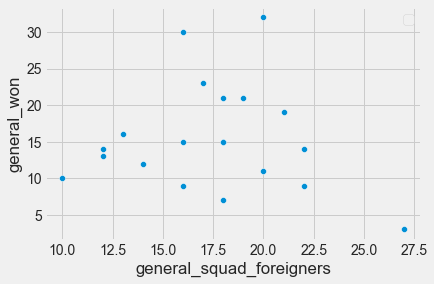

In [77]:
sns.scatterplot(df['general_squad_foreigners'], df['general_won'])
plt.xlabel('general_squad_foreigners')
plt.ylabel('general_won')
plt.legend()
plt.show()

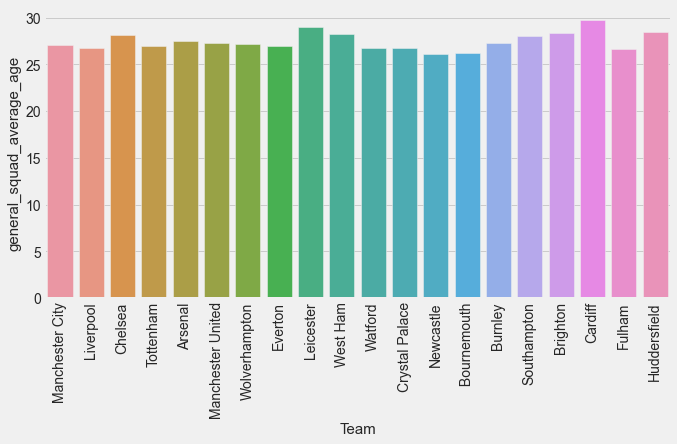

In [76]:
# barplot
plt.figure(figsize=(10, 5))
plot= sns.barplot(x = 'Team',
            y = 'general_squad_average_age',
            data = df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Team', fontsize=15)
plt.ylabel('general_squad_average_age', fontsize=15)
# Show the plot
plt.show()